In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
dt = pd.read_csv(r"C:\Users\parvathi\Desktop\ML\Ml notes\Diabetes_dataset.csv")
dt

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
dt.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
dt['Diabetes'] = dt['Diabetes_binary']
dt.drop(columns = 'Diabetes_binary', inplace=True)

In [6]:
for i in dt.columns:
    print(i,'\n',dt[i].value_counts())
    print('-'*90)

HighBP 
 0.0    144851
1.0    108829
Name: HighBP, dtype: int64
------------------------------------------------------------------------------------------
HighChol 
 0.0    146089
1.0    107591
Name: HighChol, dtype: int64
------------------------------------------------------------------------------------------
CholCheck 
 1.0    244210
0.0      9470
Name: CholCheck, dtype: int64
------------------------------------------------------------------------------------------
BMI 
 27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64
------------------------------------------------------------------------------------------
Smoker 
 0.0    141257
1.0    112423
Name: Smoker, dtype: int64
------------------------------------------------------------------------------------------
Stroke 
 0.0    243388
1.0     10292
Name: Stroke, dtype: int64
-------------------

In [7]:
dt = dt.astype('int32')
dt.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,1,0,0,1,0,1,...,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,1,0,1,0,1,1,...,0,5,30,30,1,0,9,5,1,1
9,0,0,1,24,0,0,0,0,0,1,...,0,2,0,0,0,1,8,4,3,0


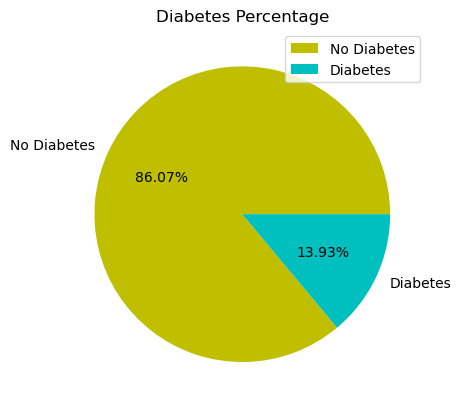

In [8]:
plt.pie(dt['Diabetes'].value_counts(), labels=['No Diabetes','Diabetes'], autopct='%.2f%%', colors=['y','c'])
plt.title("Diabetes Percentage")
plt.legend()
plt.show()


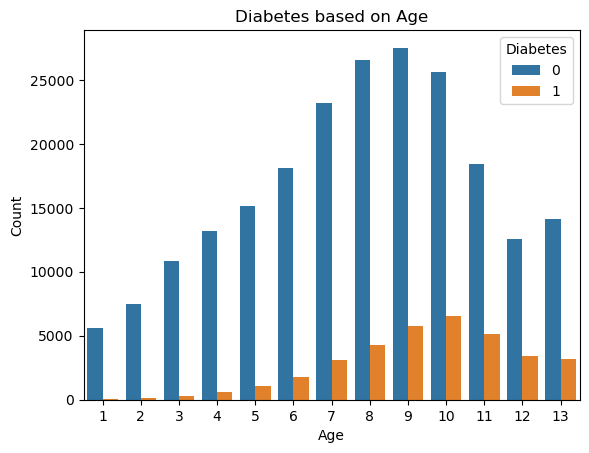

In [9]:
sns.countplot(x='Age', data=dt, hue='Diabetes')
plt.title('Diabetes based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

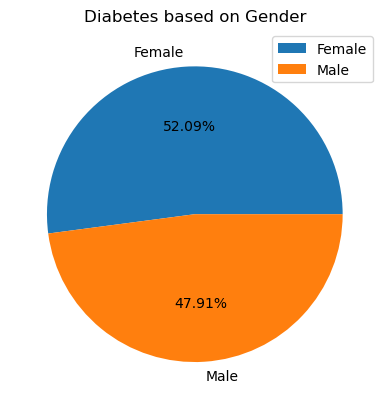

In [10]:
dia_present = dt.where(dt.Diabetes==1)
dia_present.dropna(inplace=True)

plt.pie(dia_present['Sex'].value_counts(), labels=['Female','Male'], autopct='%1.2f%%')
plt.title('Diabetes based on Gender')
plt.legend()
plt.show()

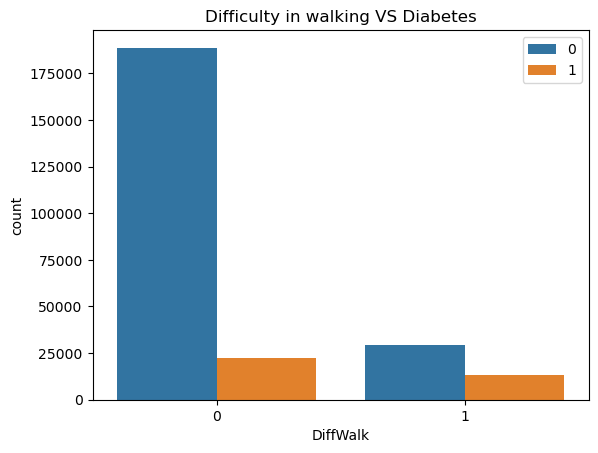

In [11]:
sns.countplot(x='DiffWalk', data=dt, hue='Diabetes')
plt.title('Difficulty in walking VS Diabetes')
plt.legend()
plt.show()

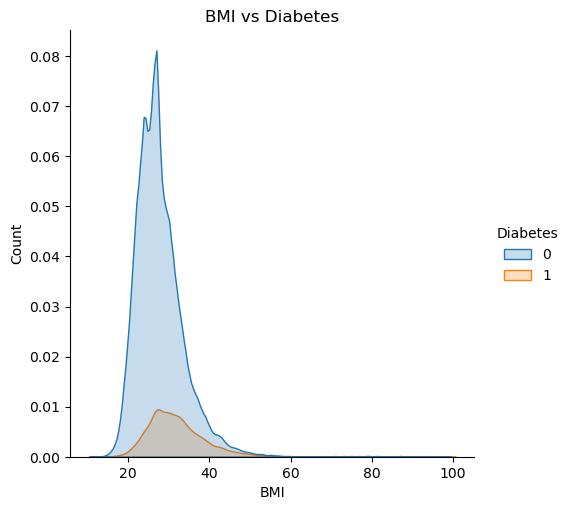

In [12]:
sns.displot(dt, x="BMI", hue="Diabetes", kind="kde", fill=True)
plt.title('BMI vs Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

In [13]:

X = dt.drop(['Diabetes','Fruits','Veggies','AnyHealthcare','Education','NoDocbcCost','MentHlth','PhysHlth'],axis=1)
y = dt['Diabetes']
print(X.shape)
print(y.shape)

(253680, 14)
(253680,)


In [14]:
ss=StandardScaler()
SX = ss.fit_transform(X)
print("Before Preprocessing:\n",X[:5])
print("\n\n\nAfter Preprocessing:\n",SX[:5])





Before Preprocessing:
    HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  HvyAlcoholConsump  GenHlth  DiffWalk  Sex  Age  Income  
0             0                  0        5         1    0    9       3  
1             1                  0        3         0    0    7       1  
2             0                  0        5         1    0    9       8  
3             1                  0        2         0    0   11       6  
4             1                  0        2         0    0   11       4  



After Preprocessing:
 [[ 1.15368814  1.16525449  0.19692156  1.7579

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(SX, y, test_size=.10, random_state=1)
print(X_train.shape)
print(X_test.shape)

(228312, 14)
(25368, 14)


In [16]:
#LOGISTIC REGRESSION

print("LOGISTIC REGRESSION")
print("-"*50)
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr_model = lgr.fit(X_train,y_train)
y_pre_lgr = lgr_model.predict(X_test)
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pre_lgr))
print("\n\nClassification Report: \n", classification_report(y_test,y_pre_lgr))
lgr_accuracy = accuracy_score(y_test,y_pre_lgr)*100
print("Accuracy Score using Logistic Regression: ", lgr_accuracy)

LOGISTIC REGRESSION
--------------------------------------------------

Confusion Matrix: 
 [[21286   490]
 [ 3050   542]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     21776
           1       0.53      0.15      0.23      3592

    accuracy                           0.86     25368
   macro avg       0.70      0.56      0.58     25368
weighted avg       0.83      0.86      0.83     25368

Accuracy Score using Logistic Regression:  86.04541154210028


In [17]:
#RANDOM FOREST CLASSIFIER

print("RandomForest Classifier")
print("-"*50)
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train,y_train)
y_pre_rfc = rfc_model.predict(X_test)
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pre_rfc))
print("\n\nClassification Report: \n", classification_report(y_test,y_pre_rfc))
rfc_accuracy = accuracy_score(y_test,y_pre_rfc)*100
print("Accuracy Score using RandomForestClassifier: ", rfc_accuracy)


RandomForest Classifier
--------------------------------------------------

Confusion Matrix: 
 [[20604  1172]
 [ 2765   827]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     21776
           1       0.41      0.23      0.30      3592

    accuracy                           0.84     25368
   macro avg       0.65      0.59      0.60     25368
weighted avg       0.82      0.84      0.83     25368

Accuracy Score using RandomForestClassifier:  84.48044780826238


In [ ]:

#SUPPORT VECTOR MACHINE

print("Support Vector Classifier")id
print("-"*50)
from sklearn.svm import SVC

svc = SVC()
svc_model = svc.fit(X_train,y_train)
y_pre_svc = svc_model.predict(X_test)
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pre_svc))
print("\n\nClassification Report: \n", classification_report(y_test,y_pre_svc))
svc_accuracy = accuracy_score(y_test,y_pre_svc)*100
print("Accuracy Score using Support Vector Classifier: ", svc_accuracy)



Support Vector Classifier
--------------------------------------------------
